# Waze App User Churn Prediction & Retention
# Business Problem

My team is close to completing a churn project. Previously, we completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, we built a binomial logistic regression model based on multiple variables.

Leadership appreciates all our hard work. Now, they want my team to build a machine learning model to predict user churn. To get the best results, my team decides to build and test two tree-based models: random forest and XGBoost.

The team work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.


# Project Goals

The goal of this model is to predict whether or not a Waze user is retained or churned.

# Project Purpose
The purpose of this model is to find factors that drive user churn.


# Skills and Tools Applied

🔹 1. Data Understanding & Preprocessing (pandas, numpy, sklearn)

🔹 2. Modeling: Random Forest & XGBoost (bootstrapping, gradient boosting, GridSearchCV, max_depth, n_estimators,                      learning_rate, subsample)

🔹 3. Model Evaluation (Accuracy, Precision, Recall, F1 Score, ROC-AUC,  k-fold cross-validation or stratified CV)

🔹 4. Interpretability & Insights (Gini, Gain, matplotlib, seaborn, SHAP plots)

🔹 5. Visualization & Communication (matplotlib/seaborn/SHAP)

# This activity has three parts:

# Part 1: Ethical considerations

- Consider the ethical implications of the request

- Should the objective of the model be adjusted?

# Part 2: Feature engineering

- Perform feature selection, extraction, and transformation to prepare the data for modeling

# Part 3: Modeling

- Build the models, evaluate them, and advise on next steps

What are the ethical implications of the model? What are the consequences of your model making errors?

What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?
- Waze will fail to take proactive measures to retain users who are likely to stop using the app. For example, Waze might proactively push an app notification to users, or send a survey to better understand user dissatisfaction.

What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?
- Waze may take proactive measures to retain users who are NOT likely to churn. This may lead to an annoying or negative experience for loyal users of the app.

Do the benefits of such a model outweigh the potential problems?
- The proactive measueres taken by Waze might have unintended effects on users, and these effects might encourage user churn. Follow-up analysis on the effectiveness of the measures is recommended. If the measures are reasonable and effective, then the benefits will most likely outweigh the problems.

Would you proceed with the request to build this model? Why or why not?
- Yes. There aren't any significant risks for building such a model.

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

Now read in the dataset as df1 and inspect the first five rows.

In [2]:
# Import dataset
#Read dataframe
file_path = r"C:\Users\DEPROMISE501\Downloads\waze.csv"
df1 = pd.read_csv(file_path)


In [3]:
# Inspect the first ten rows
df1.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


# Feature engineering

We have already prepared much of this data and performed exploratory data analysis (EDA) in previous deliverables. We know that some features had stronger correlations with churn than others, and we also created some features that may be useful.

In this part of the project, we'll engineer these features and some new features to use for modeling.

To begin, we create a copy of `df1` to preserve the original dataframe. 

In [4]:
# Copy the df0 dataframe
df = df1.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


__km_per_driving_day__

Creating a feature representing the mean number of kilometers driven on each driving day in the last month for each user. Then add this feature as a column to df.

We'll get descriptive statistics for this new feature

In [6]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Get descriptive stats
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Notice that some values are infinite. This is the result of there being values of zero in the driving_days column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

We converted these values from infinity to zero. We can use np.inf to refer to a value of infinity.

Call describe() on the km_per_driving_day column to verify that it worked.

In [7]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

__percent_sessions_in_last_month__

We create a new column percent_sessions_in_last_month that represents the percentage of each user's total sessions that were logged in their last month of use.

Also, got descriptive statistics for this new feature

In [8]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# 2. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

__professional_driver__

We create a new, binary feature called professional_driver that is a 1 for users who had 60 or more drives and drove on 15+ days in the last month.

Note: The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, We used domain knowledge and intuition to determine these deciding thresholds, but ultimately they are arbitrary.

In [9]:
# Create `professional_driver` feature
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)
df['professional_driver'].describe()

count    14999.000000
mean         0.172945
std          0.378212
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: professional_driver, dtype: float64

__total_sessions_per_day__

Now, we created a new column that represents the mean number of sessions per day since onboarding.

In [10]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

As with other features, we get descriptive statistics for this new feature.

In [11]:
# Get descriptive stats
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

__km_per_hour__

We create a column representing the mean kilometers per hour driven in the last month.

In [12]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

These numbers are obviously problematic, and it would be worthwhile to seek clarification from Waze regarding how these features are collected to better understand why such unrealistic speeds are observed.

__km_per_drive__

We create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [13]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

This feature has infinite values too. We converted the infinite values to zero, then confirm that it worked.


In [14]:
# 1. Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

__percent_of_drive_to_favorite__

Finally, we created a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People who drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [15]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

# Get descriptive stats
df['percent_of_drives_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_drives_to_favorite, dtype: float64

# Drop missing values

Because we know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the label column, and because these observations comprise less than 5% of the data, we use the dropna() method to drop the rows that are missing in this data.

In [16]:
# Drop rows with missing values
df = df.dropna(subset=['label'])

# Task 4. Outliers
We know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

# Task 5. Variable encoding

Dummying features

In order to use device as an X variable, we will need to convert it to binary, since this variable is categorical.

In cases where the data contains many categorical variables, one can use pandas built-in pd.get_dummies(), or use scikit-learn's OneHotEncoder() function.

Note: Each possible category of each feature will result in a feature for our model, which could lead to an inadequate ratio of features to observations and/or difficulty understanding our model's predictions.

Because this dataset only has one remaining categorical feature (device), it's not necessary to use one of these special functions. We can just implement the transformation directly.

Create a new, binary column called device2 that encodes user devices as follows:

Android -> 0

iPhone -> 1

In [17]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


__Target encoding__

The target variable is also categorical, since a user is labeled as either "churned" or "retained." We change the data type of the label column to be binary. This change is needed to train the models.

Assign a 0 for all retained users.

Assign a 1 for all churned users.

Saving this variable as label2 so as not to overwrite the original label variable.

In [18]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


# Task 6. Feature selection
Tree-based models can handle multicollinearity, so the only feature that can be cut is ID, since it doesn't contain any information relevant to churn.

Note, however, that device won't be used simply because it's a copy of device2.


# Task 7. Evaluation metric
Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, we examine the class balance of our target variable.

In [19]:
# Get class balance of 'label' col
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, we consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, we select the model based on the recall score.

# Task 8. Modeling workflow and model selection process

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

- 1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in ~2,860 samples in the validation set and the same number in the test set, of which ~18%—or 515 samples—would represent users who churn.

- 2. Fit models and tune hyperparameters on the training set
- 3. Perform final model selection on the validation set
- 4. Assess the champion model's performance on the test set


# Task 9. Split the data
Now we're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable X that isolates the features. Remember not to use device.

2. Define a variable y that isolates the target variable (label2).

3. Split the data 80/20 into an interim training set and a test set. Not forgetting to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [40]:
# 1. Isolate X variables
X = df.drop(columns=['label', 'label2', 'device'])

# 2. Isolate y variable
y = df['label2']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.25, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

Verify the number of samples in the partitioned data.

In [21]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8043
2681
3575


This aligns with expectations.

# Task 10. Modeling

Random forest

We begin with using GridSearchCV to tune a random forest model.

1. Instantiate the random forest classifier rf and set the random state.

2. Create a dictionary cv_params of any of the following hyperparameters and their corresponding values to tune. The more we tune, the better our model will fit the data, but the longer it will take.

- max_depth
- max_features
- max_samples
- min_samples_leaf
- min_samples_split
- n_estimators

3. Define a list scoring of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the GridSearchCV object rf_cv. Pass to it as arguments:

- estimator=rf
- param_grid=cv_params
- scoring=scoring
- cv: define the number of cross-validation folds you want (cv=_)
- refit: indicate which evaluation metric you want to use to select the model (refit=_)

refit should be set to 'recall'.

In [41]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

Now we fit the model to the training data.

In [42]:
%%time
rf_cv.fit(X_train, y_train)

Wall time: 4min 16s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Examine the best average score across all the validation folds.

In [43]:
# Examine best score
rf_cv.best_score_

0.13173921253894816

We examine the best combination of hyperparameters.

In [44]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Use the make_results() function to output all of the scores of your model. Note that the function accepts three arguments.

In [26]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the GridSearch object to the make_results() function.

In [27]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.465459,0.131739,0.205145,0.818973


Asside from the accuracy, the scores aren't that good. However, we recall that when we built the logistic regression model in the last deliverables, the recall was ~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

# XGBoost

We try to improve our scores using an XGBoost model.

1. Instantiate the XGBoost classifier xgb and set objective='binary:logistic'. Also set the random state.

2. Create a dictionary cv_params of the following hyperparameters and their corresponding values to tune:

- max_depth
- min_child_weight
- learning_rate
- n_estimators

3. Define a list scoring of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the GridSearchCV object xgb_cv. Pass to it as arguments:

- estimator=xgb
- param_grid=cv_params
- scoring=scoring
- cv: define the number of cross-validation folds you want (cv=_)

refit: indicate which evaluation metric you want to use to select the model (refit='recall')

In [45]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

Now we fit the model to the X_train and y_train data.

In [47]:
%%time
xgb_cv.fit(X_train, y_train)

Wall time: 1min 49s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None

Get the best score from this model.

In [48]:
# Examine best score
xgb_cv.best_score_

0.18780883139772764

And the best parameters.

In [31]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 300}

We use the make_results() function to output all of the scores of our model. Note that the function accepts three arguments.

In [50]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.465459,0.131739,0.205145,0.818973
0,XGB cv,0.436636,0.187809,0.262630,0.812881
0,RF val,0.392857,0.115789,0.178862,0.811637
0,XGB val,0.370968,0.145263,0.208775,0.804924
0,XGB test,0.385827,0.154574,0.220721,0.806434
0,XGB cv,0.436636,0.187809,0.262630,0.812881
0,XGB cv,0.436636,0.187809,0.262630,0.812881


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous deliverables, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

# Task 11. Model selection


Now, we used the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

# Random forest

In [33]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

We use the get_test_scores() function to generate a table of scores from the predictions on the validation data.

In [53]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [52]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.465459,0.131739,0.205145,0.818973
0,XGB cv,0.436636,0.187809,0.262630,0.812881
0,RF val,0.392857,0.115789,0.178862,0.811637
0,XGB val,0.370968,0.145263,0.208775,0.804924
0,XGB test,0.385827,0.154574,0.220721,0.806434
0,XGB cv,0.436636,0.187809,0.262630,0.812881
0,XGB cv,0.436636,0.187809,0.262630,0.812881
0,RF val,0.392857,0.115789,0.178862,0.811637


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

# XGBoost

Now, we did the same thing to get the performance scores of the XGBoost model on the validation data.

In [36]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.465459,0.131739,0.205145,0.818973
0,XGB cv,0.436636,0.187809,0.262630,0.812881
0,RF val,0.392857,0.115789,0.178862,0.811637
0,XGB val,0.370968,0.145263,0.208775,0.804924


# Task 12. Use champion model to predict on test data
Now, we're using the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should the model be used.

In [37]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.465459,0.131739,0.205145,0.818973
0,XGB cv,0.436636,0.187809,0.262630,0.812881
0,RF val,0.392857,0.115789,0.178862,0.811637
0,XGB val,0.370968,0.145263,0.208775,0.804924
0,XGB test,0.385827,0.154574,0.220721,0.806434


The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

# Task 13. Confusion matrix
Plot a confusion matrix of the champion model's predictions on the test data.

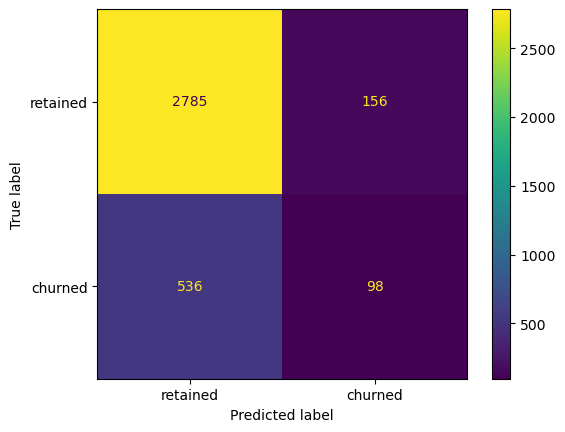

In [38]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

The model predicted over three times as many false negatives than it did false positives, and it correctly identified only 18.1% of the users who actually churned.

# Task 14. Feature importance
Use the plot_importance function to inspect the most important features of your final model.

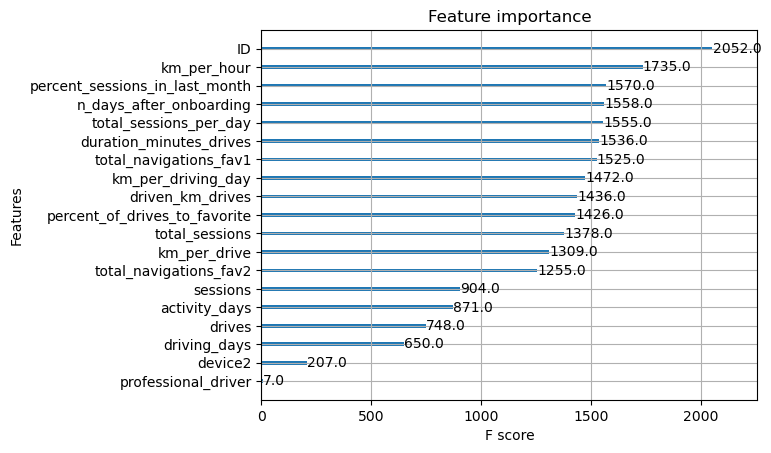

In [39]:
plot_importance(xgb_cv.best_estimator_);

The XGBoost model made more use of many of the features than did the logistic regression model from the previous deliverables, which weighted a single feature (activity_days) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

# Task 15. Conclusion

The current champion model (XGBoost) for Waze user churn prediction, despite an overall accuracy of approximately 80.6%, is critically ineffective for driving targeted retention strategies.

Specifically:

- The model misses a vast majority of actual churners. With a Recall of only 15.5%, it identifies merely 98 out of 634 users who actually churned. This means 84.5% of users who will churn are not flagged for intervention.


- The model also has low precision in its predictions. When it flags a user as likely to churn (98 True Churners + 156 False Churners), it is only correct 38.6% of the time. This implies that over 60% of retention efforts based on this model would be misdirected towards users who would have retained anyway.

# Task 16. Recommendation

Given the model's current performance, here are key recommendations:

1. Do NOT deploy this model for active, automated retention campaigns.

- Implementing it would lead to significant wasted resources on misidentified users (False Positives) and, more critically, miss most genuine churn opportunities (high False Negatives), rendering retention efforts largely ineffective.

2. Prioritize Model Re-Development and Improvement.

- Focus on Recall: The primary objective of a churn model is to identify churners. Future development must heavily prioritize improving Recall, even if it means a slight trade-off in Precision initially.

- Addressing Class Imbalance: Implement advanced techniques for imbalanced datasets (e.g., oversampling the minority class, undersampling the majority class, using cost-sensitive learning algorithms, or exploring anomaly detection methods for churn).

- Alternative Models: Explore other sophisticated machine learning models or ensemble techniques that might be better suited for this prediction task.

3. Invest in Deeper Descriptive & Diagnostic Analytics for Churn Reasons.

- Since prediction is currently weak, shift resources towards understanding why users churn. Analyze the characteristics of the 536 missed churners (False Negatives in the matrix) to understand what common patterns exist among them that the model failed to capture. Similarly, analyze the 156 false alarms (False Positives).

- Conduct qualitative research (user surveys, interviews, feedback analysis) to gather direct insights from users who have reduced or stopped using the app.

4. Clearly Define the Business Value/Cost Matrix.

- Work with the data team to quantify the cost of a missed churner versus the cost of a misdirected retention effort. This will help to calibrate future model development for the optimal balance of precision and recall that aligns with Waze's business goals.